# A.5. The Fed

## Fixed Income Module

### DRW New-Hire Learning Program

#### Summer 2022

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from scipy.optimize import fsolve  

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

In [2]:
data = pd.read_excel('../data/fed_data.xlsx',sheet_name='data').set_index('date')

FREQ = 52

if FREQ == 4:
    FREQcode = 'Q'
elif FREQ == 1:
    FREQcode = 'Y'
elif FREQ==12:
    FREQcode = 'M'
elif FREQ==52:
    FREQcode = 'W-FRI'

data = data.resample(FREQcode).agg('last')

info = pd.read_excel('../data/fed_data.xlsx',sheet_name='info').set_index('ticker (FRED)')

# Fed Funds Rate

The Fed Funds rate is the rate at which private banks agree to lend each other money overnight.
- It is a transaction between two private parties, so the rate is determined by market forces.
- Still, the Fed has a great ability to manipulate this rate through the money supply.
- Thus, monetary policy is typically discussed in terms of targeting the Fed Funds rate.
- The rate gets its name because the Fed sets a reserve requirement that the banks must have in their vaults overnight. 
- Thus, the overnight lending between banks is really about having the funds mandated by the Fed.

### Monetary policy in the media

In the media, monetary policy is typically reported with statements such as
*Powell lowered interest rates half a percentage point today.*

- What does this mean?
- Of course, Powell did not change “interest rates.” Almost all interest rates are determined in the market. Powell manipulated a specific rate, the Fed Funds rate.
- As noted above, the Fed Funds rate is a market rate, so the Fed "sets" it via open market operations discussed below.

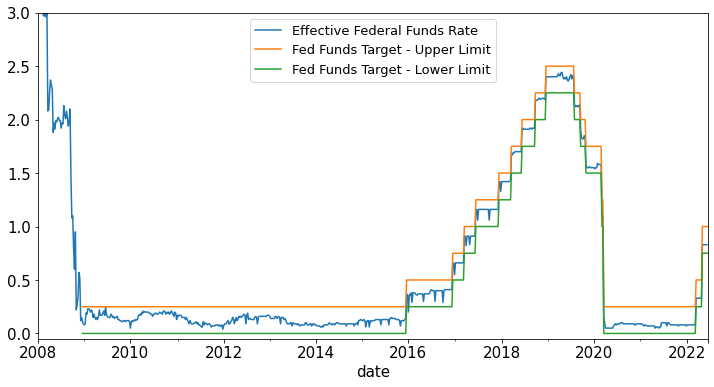

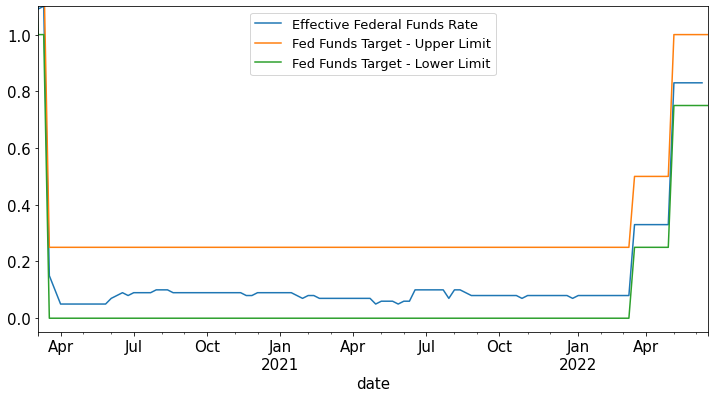

In [3]:
ticks = ['EFFR','DFEDTARU','DFEDTARL']
leg = info.loc[ticks,'description'].to_list()

data[ticks].plot(xlim=('2008',data.index[-1]),ylim=[-.05,3])
plt.legend(leg)
plt.show()

data[ticks].plot(xlim=('2020-03-01',data.index[-1]),ylim=(-.05,1.1))
plt.legend(leg)
plt.show()

## Excess Reserves

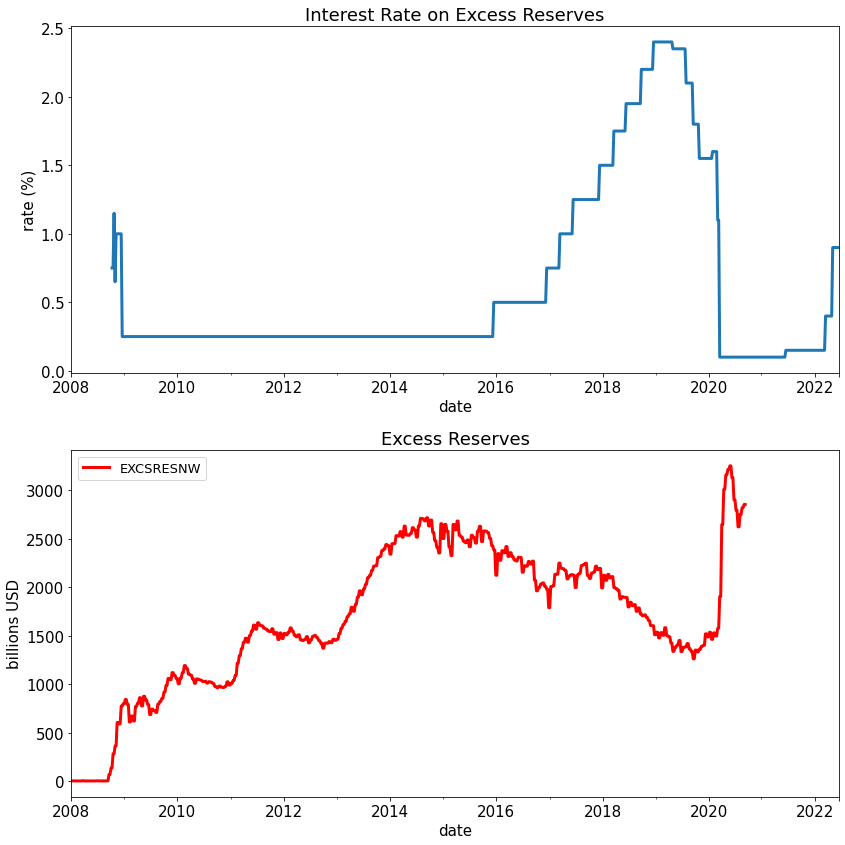

In [4]:
ioer = data[['IOER']].dropna().rename(columns={'IOER':'reserve rate'})
iorb = data[['IORB']].dropna().rename(columns={'IORB':'reserve rate'})
rate_reserves = pd.concat([ioer.iloc[:-1], iorb],axis=0)

fig, ax = plt.subplots(2,1,figsize=(12,12))
rate_reserves.plot(ax=ax[0], title='Interest Rate on Excess Reserves', legend=[], xlim=('2008',None),ylabel='rate (%)',linewidth=3)
(data[['EXCSRESNW']]/1000).plot(ax=ax[1],title='Excess Reserves',xlim=('2008',None),ylabel='billions USD',color='r',linewidth=3)

plt.tight_layout()
plt.show()

## The Discount Window

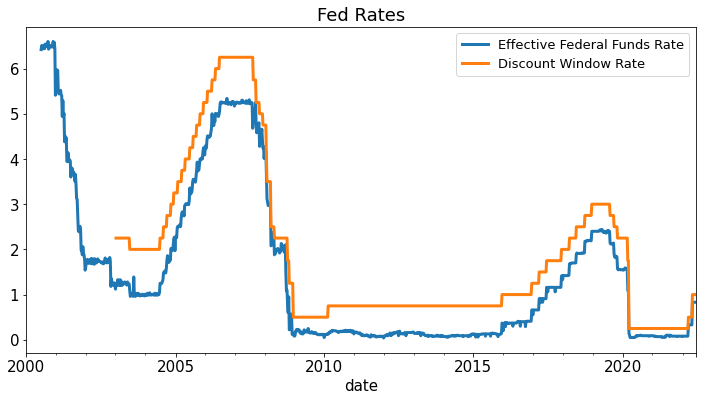

In [5]:
ticks = ['EFFR','DPCREDIT']
leg = info.loc[ticks,'description'].to_list()

data[ticks].plot(linewidth=3,title='Fed Rates')
plt.legend(leg)
plt.show()

![fed_bb_dashboard.png](../refs/fed_bb_dashboard.png)
#### Source
Bloomberg FDTR

# Open Market Operations

An **expansionary** open market operation, the Fed prints money and uses it to buy Treasury bonds.
- This puts more money into the economy and raises the money supply.
- In effect, it is as if the Fed is printing money and dropping it into the economy.
- This causes downward pressure on short-term rates.

A **contractionary** open market operation is the reverse:
- Sell some of the accumulated bonds in order to pull money back out of the market.
- This causes upward pressure on short-term rates.

The Fed does not target the actual money supply, but rather a particular short-term interest rate: the **Fed Funds rate**.

- These are two sides of the same coin.
- The short-term Fed Funds rate moves negatively with the money supply.
- At times, central banks target the actual money supply but it is harder to measure in real time.

### Monetary Policy
*so as to promote effectively the goals of maximum employment, stable prices, and moderate long-term interest rates.*

#### Referred to as the dual mandate
- Keep inflation low and stable
- Keep economy at full employment
- Third goal listed above regarding interest rates is seen as a consequence of the two above.

See the Inflation note for more on this topic.

#### Reference
https://www.federalreserve.gov/monetarypolicy/monetary-policy-what-are-its-goals-how-does-it-work.htm

## Temporary OMO

Importance of overnight repo.

### Statement from the Fed...
    Temporary open market operations involve short-term repurchase and reverse repurchase agreements that are designed to temporarily add or drain reserves available to the banking system and influence day-to-day trading in the federal funds market.

### Reverse Repo as described by the Fed
    A reverse repurchase agreement (known as reverse repo or RRP) is a transaction in which the New York Fed under the authorization and direction of the Federal Open Market Committee sells a security to an eligible counterparty with an agreement to repurchase that same security at a specified price at a specific time in the future. For these transactions, eligible securities are U.S. Treasury instruments, federal agency debt and the mortgage-backed securities issued or fully guaranteed by federal agencies.
    For more information, see https://www.newyorkfed.org/markets/rrp_faq.html

#### Reference:
https://fred.stlouisfed.org/series/RRPONTSYD

#### FAQ on Fed's Reverse Repos
https://www.newyorkfed.org/markets/rrp_faq.html

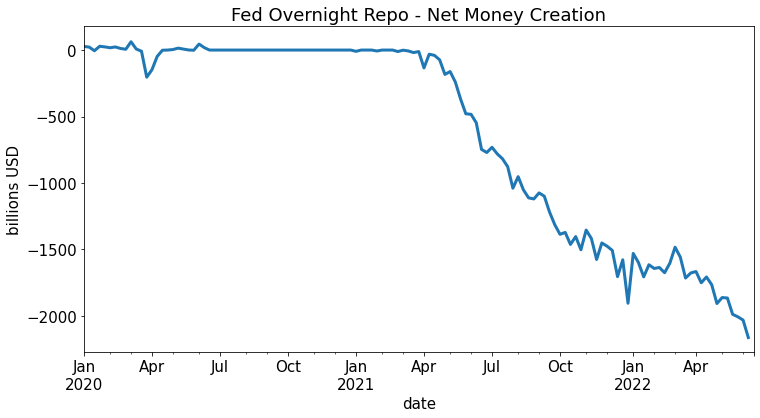

In [6]:
repo = data['RPONTSYD'] - data['RRPONTSYD']
repo.plot(xlim=('2020',None),linewidth=3,title='Fed Overnight Repo - Net Money Creation',ylabel='billions USD')

plt.show()

## Beyond Treasuries

It is not critical that Treasury bonds be used when the Fed exchanges new money for securities.
- They could buy many things, but Treasury bonds are safe, liquid, and convenient.
- During the Financial crisis, the Fed got very creative in what they bought.
- To inject more money, the Fed bought asset-backed-securities including some potentially distressed mortgage-backed securities.

The following figure shows how the Fed has increased its assets and broadened what it is buying.

## FOMC
The Federal Open Market Committee determines when open market operations are used.
- All 7 governors are voting members on this committee.
- The NY Fed president is also a voting member.
- Of the other 11 Fed presidents, 4 of them are voting members on a rotating basis.

### FOMC Announcements
![fed_calendar1.png](../refs/fed_calendar1.png)

#### Source
https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm


# Lender of Last Resort

# Balance Sheet

## Over Time
![fed_bs_timeseries.png](../refs/fed_bs_timeseries.png)

#### Source
https://www.clevelandfed.org/our-research/indicators-and-data/credit-easing.aspx

## By Maturity
![fed_bs_maturity.png](../refs/fed_bs_maturity.png)

#### Source:
https://www.federalreserve.gov/monetarypolicy/bst_fedsbalancesheet.htm

## Liabilities

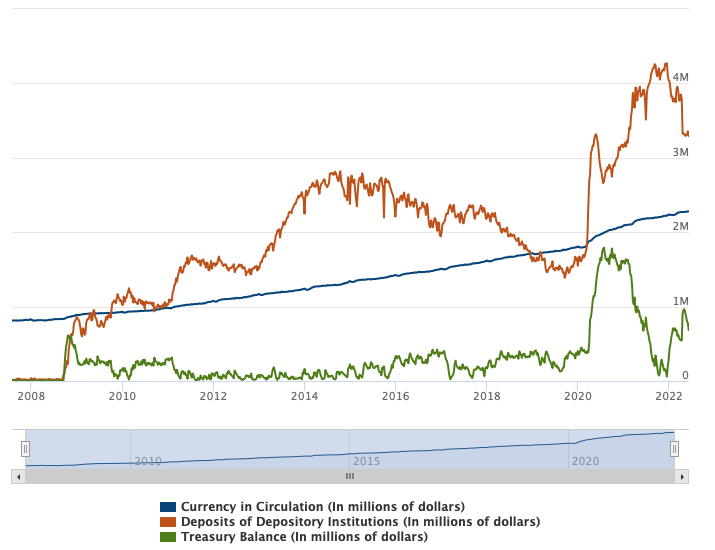

#### Source:
Fed Release H.4.1

# Appendix: Statistical Releases

### Daily H.15 Release
Selected interest rates
https://www.federalreserve.gov/releases/h15/

### H.4.1 Release
Federal Reserve's Balance Sheet
https://www.federalreserve.gov/releases/h41/

### Beige Book
https://www.federalreserve.gov/monetarypolicy/beige-book-default.htm

# Appendix: Fed Structure

The Federal Reserve is a system.
- 12 regional banks
- along with a board of 7 governors.

Regional banks
- president appointed by the regional bank’s board.

Board of Governors
- 14-year term, and is appointed by the President of the U.S. and confirmed by the Senate. The long terms are meant to give them political immunity, much like judges.
- The Chair of the Board of Governors is appointed by the President for a 4-year term.

![fed_map.png](../refs/fed_map.png)

#### Source:
https://www.federalreserve.gov/monetarypolicy/files/BeigeBook_20220601.pdf

The Fed does more than monetary policy.
- Lends to banks when they are having liquidity troubles.
- This role was an important motivation in creating the Fed in 1914, as there were many bank failures leading up to that point.

## Liquidity Facilities
![fed_credit_facilities.png](../refs/fed_credit_facilities.png)

## Support for Specific Institutions
![fed_support_institutions.png](../refs/fed_support_institutions.png)

### Source for charts
https://www.federalreserve.gov/monetarypolicy/bst_recenttrends.htm

# Appenidx: Fed's Impact on Shape of the Rate Curve

When the Fed manipulates the short-term Fed Funds rate, how does the rest of the term structure respond?
- While much research is still devoted to this question, empirical work indicates that the long term rates move in the same direction.
- Namely, the Fed pumps money through buying bonds, which lowers the Fed Funds rate. On average, the long-term rates will also go down.

## A conundrum?

The fact that the long-rates move with the Fed Funds rate is somewhat surprising.
- In the long-run, inflation is almost proportional to money growth. 
- Thus, if the Fed is pumping in money, one might think expected inflation would go up. - If investors expect more inflation, then the long-term rates would have to increase to compensate.

## A resolution?

Perhaps investors see the Fed pumping money in and infer that the Fed must be trying to fight off some inflation they see coming.
- Then investors would not take the money injection as a sign of future inflation but rather a sign that the Fed now sees deflation as a threat.

## Greenspan's Conundrum
In 2005, the usual empirical relation did not hold.
- The Fed was raising the Fed Funds rate, but long-term rates were instead falling.
- Greenspan remarked that this was a conundrum, as it did not obey the usual empirical relationship.
- Of course, this is not that puzzling considering the alternate reasoning above.
- The short rate was rising while the long rate fell until the yield curve inverted. 